# Análisis de actividad sísmica en México

![Alerta](im.png)

Para los que tengan curiosidad de ver cómo se sacó la información de la página del SSN, hay otro .ipynb en este folder donde se explica detalladamente. Lo primero que hay que hacer es cargar los paquetes necesarios. Esto significa importar (e instalar anteriormente) los siguientes paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from helpers.Mexico import Republica

republica = Republica()

sns.set_style("darkgrid")

El paquete de seaborn lo pueden instalar con pip3, al igual que folium. helpers.Mexico es un paquete que yo hice para ayudarles un poco, de ahí saco la clase `Republica`.

De los paquetes necesarios, `Folium` es por mucho el más complejo. Permite hacer mapas interactivos en jupyter. Yo me he dado a la tarea de bajar del inegi las divisiones políticas del país y pasarlas a un formato que `Folium` entiende, conocido como topojson. El archivo se encuentra en el folder `helpers`. No es necesario que entiendan su contenido, pero yo les explicaré más adelante su uso.

Carguemos rápidamente el csv de la actividad sísmica reportada por el SSN de la UNAM desde el 1 de Enero de 1990 hasta el 17 de Febrero del 2018. Además de cargar el csv, vamos a ver los primeros 5 renglones, para familiarizarnos con el formato:

In [2]:
#Definimos una lambda que convierta una cadena de caracteres en una etiqueta de tiempo.
mConverters = {'Fecha y Hora': lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') }
#Usamos la lambda para cargar el csv. Los nombres de las columnas son el primer renglón
sismos = pd.read_csv('helpers/earthquakes.csv', index_col = 0, converters = mConverters)
#Mostremos los primeros 5 renglones con la función head
sismos.head()

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora
0,3.2,15.83,-98.41,17,2018-02-17 23:57:31
1,2.8,16.28,-98.08,12,2018-02-17 23:56:51
2,3.1,16.21,-98.02,10,2018-02-17 23:53:03
3,2.8,16.03,-97.75,16,2018-02-17 23:52:22
4,4.1,32.64,-115.18,4,2018-02-17 23:49:44


El csv es muy, muy sencillo. Contiene sólo 5 columnas: Magnitud, Latitud, Longitud, Profundidad y Fecha-Hora. Las primeras tres columnas son flotantes, mientras la quinta es una estampa de tiempo. Tendrán que aprender a usar estampas de tiempo pero yo les puedo ayudar.

## Ejercicio 1: Magnitud de los sismos

Calculen las siguientes cantidades (explicando en su código cómo lo hacen):
1. Cuenta total de sismos
2. Rango de magnitud de los sismos
3. Número de sismos por cada categoría, siendo las categorías {[1,2), [2,3),[3,4),[4,5),[5,6),[6,7),[7,8),[8,9)}
3. Número de sismos en cada año, graficado como un histograma (¿Ha aumentado la actividad sísmica?)

#### Ejercicio 1: Magnitud de los sismos. Inciso 1.)
Observa que este ejercicio es muy sencillo pues, en principio, sólo tenemos que contar la cantidad de elementos que tiene "sismos". 

In [3]:
# Total de sismos

len(sismos)

105946

Hay entonces una cantidad total de 105946 sismos.

#### Ejercicio 1: Magnitud de los sismos. Inciso 2.)

Para calcular el rango, podemos hacer lo siguiente. Primero "entramos" a la serie de datos que definen la magnitud usando el comando $\textbf{sismos["Magnitud"]}$ para usar estos elementos con las operaciones que tenemos para una serie.

In [4]:
max(sismos["Magnitud"])

8.2

In [5]:
min(sismos["Magnitud"])

1.2

Observa que la magnitud máxima y mínima respectivamente son, 8.2 y 1.2. Por lo que que el rango está entre $[1.2,8.2]$.

#### Ejercicio 1: Magnitud de los sismos. Inciso 3.)

Primero veamos cómo se dividen las categorías, primero haré los arreglos de cada una de las categorías y enseguida cuánto "miden", es decir, la cantidad de sismos que hubo en ese rango de magnitud.

In [6]:
# Sea el arreglo "a", el arreglo que contiene todas las magnitudes de sismos.
a = sismos["Magnitud"]

#Haré los arreglos para cada categoría, siendo a12, el arreglo que tiene los sismos de magnitud [1,2).. Y así subsecuentemente.

a12 = a[(a>=1)&(a<2)]
a23 = a[(a>=2)&(a<3)]
a34 = a[(a>=3)&(a<4)]
a45 = a[(a>=4)&(a<5)]
a56 = a[(a>=5)&(a<6)]
a67 = a[(a>=6)&(a<7)]
a78 = a[(a>=7)&(a<8)]
a89 = a[(a>=8)&(a<9)]

In [7]:
a.head()

0    3.2
1    2.8
2    3.1
3    2.8
4    4.1
Name: Magnitud, dtype: float64

Así para la categoría [1,2) hay un total de:

In [8]:
len(a12)

54

Así para la categoría [2,3) hay un total de:

In [9]:
len(a23)

1961

Así para la categoría [3,4) hay un total de:

In [10]:
len(a34)

79319

Así para la categoría [4,5) hay un total de:

In [11]:
len(a45)

23613

Así para la categoría [5,6) hay un total de:

In [12]:
len(a56)

883

Así para la categoría [6,7) hay un total de:

In [13]:
len(a67)

98

Así para la categoría [7,8) hay un total de:

In [14]:
len(a78)

16

Así para la categoría [8,9) hay un total de:

In [15]:
len(a89)

2

#### Ejercicio 1: Magnitud de los sismos. Inciso 4.)

Primero hago el arreglo $dates$, el cual contiene toda la columna de Fecha y Hora, posteriormente con $dates.year$ obtengo sólo el arreglo de los años en los cuales hubo actividad sísmica. Posteriormente hago el histograma usando este arreglo.

In [16]:
sismos["Fecha y Hora"]
dates = pd.DatetimeIndex(sismos["Fecha y Hora"])

dates.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990],
           dtype='int64', name='Fecha y Hora', length=105946)

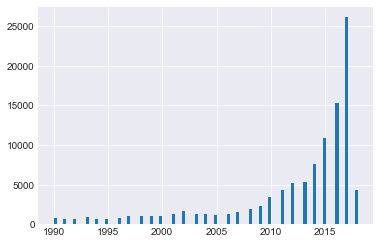

In [17]:
plt.hist(dates.year,bins = "auto");

Podemos observar que la actividad sísmica, en efecto, ha ido aumentando, de hecho podemos observar del histograma que ha crecido de forma drástica. Observemos que 2017 tiene una actividad sísmica sin precedente.

## Ejercicio 2: Graficando en el mapa

Para lo que viene, ustedes deben añadir una columna de nombre "Estado" al DataFrame `sismos`. Para ello, la variable `republica` declarada al principio del documento tiene una función llamada `estadoSegunPunto` que recibe como parámetros un par de números (latitud y longitud) y dice en qué estado de la república ocurrió el sismo (por ejemplo `republica.estadoSegunPunto(19,-100)`. La función devuelve `np.nan` si el punto no se encuentra dentro de un estado. Como ejercicio:

1. Calculen el porcentaje de epicentros dentro del territorio mexicano (en este caso el mar no cuenta).
2. Calculen cuántos sismos ocurrieron por estado.
3. Determinen cual es el estado con menor actividad sísmica (en cuanto a epicentros) y cuál el de mayor
4. Hagan un mapa de colores de la actividad sísmica por estado. Agarren buenos colores y usen una buena escala.

Para el cuarto punto, utilicen `Folium`. Les dejo el tip: las funciones que necesitan son `folium.Map()` (que genera un objeto, llamémoslo `mexmap`) y la función `.choropleth` (miembro de `mexmap`). Hay ejemplos en internet de esto, pero si tienen dudas y están muy muy frustrados, mándenme un correo y les ayudo un poco. Para generar el _choropleth_, necesitan el archivo `helpers/mexican_states.geojson`, la función `choropleth` se los va a pedir pero no tienen que entender lo que hay dentro. Ah, eso sí, los nombres de los estados están etiquetados por el nombre "NOM_ENT" (`choropleth` se los va a pedir...).

#### Ejercicio 2: Graficando el mapa. Inciso 1).

Para este inciso veamos que lo primero que debemos hacer es crear la columna $Estado$, la cual usaremos lo que dice el hint de este ejercicio. Como sabemos, para crear la nueva columna basta con darle nombre en el mismo arreglo $sismos$. Usaré la función $estadoSegunPunto$ usando la función `apply` y la función `lambda` para aplicar esta función usando valores de los arreglos `Latitud` y `Longitud`.

In [18]:
sismos["Estado"] = sismos.apply(lambda row: republica.estadoSegunPunto(row["Latitud"],row["Longitud"]), axis = 1)

Ya teniendo la columna `Estado` en el DataFrame lo que podemos realizar es contar los NaN's (no sé si puedan  contar strings) dentro de la columna, posteriormente sólo hace faltar divir el numero de NaN's entre el total de sismos. Y hacer la resta $(1 - (#NaN's/#Sismos))*100$, lo que nos da el porcentaje.

In [19]:
(1-(sismos["Estado"].isnull().sum()/len(sismos)))*100

43.97051328035037

Así entonces el porcentaje de sismos en territorio mexicano es de $\approx 43.97 \% $ del total de sismos.

#### Ejercicio 2: Graficando el mapa. Inciso 2).

Primero usemos la función `value_counts()`, la cual se aplica a todo la columna de estados y nos regresa la cantidad de sismos por estado.
Además deseo hacer un histograma con estos valores (por estado) para presentar la información gráficamente. Ten en cuenta que para este caso del histograma, como haré un histograma de frecuencias, primero manipularé la columna `sismos["Estado"]` para quitarle todos los valores NaN.

In [20]:
sismos["Estado"].value_counts()

Oaxaca                             23615
Guerrero                           11732
Chiapas                             3387
Veracruz de Ignacio de la Llave     2415
Michoacán de Ocampo                 1628
Jalisco                             1269
Puebla                               556
Nuevo León                           355
Chihuahua                            340
Hidalgo                              329
México                               285
Distrito Federal                     115
Morelos                               97
Tabasco                               81
San Luis Potosí                       65
Tamaulipas                            64
Durango                               62
Sinaloa                               37
Aguascalientes                        33
Coahuila de Zaragoza                  30
Guanajuato                            27
Zacatecas                             25
Tlaxcala                              19
Querétaro                             17
Campeche        

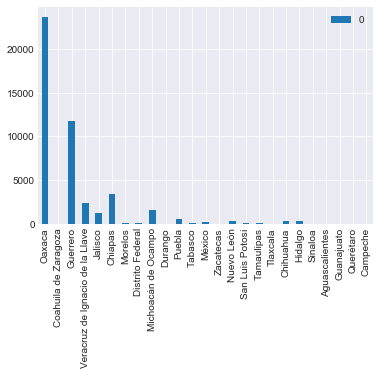

In [21]:
from collections import Counter

CopySismos = sismos

sismosLimpios = CopySismos.dropna(subset = ["Estado"])

letter_counts = Counter(sismosLimpios["Estado"])

df = pd.DataFrame.from_dict(letter_counts, orient='index')

df.plot(kind='bar')

In [22]:
letter_counts;

In [23]:
ActSis = pd.DataFrame.from_dict(letter_counts, orient='index').reset_index()
#ActSis["Estado"] = ActSis["index"]
#ActSis["Frecuencia"] = ActSis["0"]
ActSis = ActSis.rename(columns={'index':'Estado', 0:'Frecuencia'})
ActSis.sort_values("Frecuencia")

,Estado,Frecuencia
24,Campeche,2
23,Querétaro,17
17,Tlaxcala,19
13,Zacatecas,25
22,Guanajuato,27
1,Coahuila de Zaragoza,30
21,Aguascalientes,33
20,Sinaloa,37
9,Durango,62
16,Tamaulipas,64


#### Ejercicio 2: Graficando el mapa. Inciso 3).

Observa que este inciso es súper fácil ya que se realizó el anterior, pues viendo la cantidad de sismos (por epicentro) que hay en cada estado. Podemos ver que el de mayor actividad sísmica `Oaxaca`y el de menor actividad sísmica es `Campeche`. Igual se puede observar en el histograma de frecuencias.

In [124]:
mexmap = folium.Map()

import os
import json

state_geo = os.path.join('helpers/mexican_states.geojson')

mexmap = folium.Map([25,-100], zoom_start=4.4)

mexmap.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=ActSis,
    columns=['Estado','Frecuencia'],
    key_on='properties.NOM_ENT',
    fill_color='YlOrBr',
    fill_opacity=0.75,
    line_opacity=0.9,
    legend_name='Actividad Sísmica' ,
    highlight=True
)


folium.LayerControl().add_to(mexmap)


mexmap

## Ejercicio 3: Terremotos

En este bloque:
1. Calculen cuántos sismos de magnitud igual o mayor a 6.8 han ocurrido en los últimos 28 años
2. Saquen la distancia temporal entre ellos, calculen su media y la desviación estándar (¿Algún patrón?)
3. Verifiquen, con el coeficiente de correlación, si hay dependencia entre magnitud y profundidad de los terremotos
4. **Colóquenlos en el mapa, de manera proporcional a la energía que liberaron** (un poco de ayuda después)

La tarea de graficar esto no es tan sencilla, por fortuna seguimos utilizando `folium`.

Para el 4to punto, necesito que hagan algo muy específico: La escala de Richter es una escala logaritmica de base 10, donde la magnitud $M_L$ se determina como.

$M_L = log_{10}(\frac{A}{A(\delta})$

siendo $A$ la amplitud registrada por un sismografo, y $A(\delta)$ una función de amplitud de referencia con una compensación basada en la distanca del sismógrafo al epicentro del sismo $\delta$. La relación de energía con la amplitud de una onda sismicaa es $E \propto A^{3/2}$. Esto quiere decir que un sismo de 5 grados libera $\approx 31.6$ veces menos energía que un sismo de 6 grados. Para graficar la localización y cantidad de energía liberada por estos sismos, hagan uso de la función "CircleMarker" de folium, y hagan una selección **adecuada** (en verdad enfatizo eso) del radio de los marcadores, sabiendo que lo que se busca es que los círculos representen la cantidad de energía liberada.

Además les dejo una función que hace un gradiente lineal de color entre dos tripletes RGB (red green blue) entre dos escalas de sismos (por defecto, 6.8 un extremo y 8.2 el otro). La pueden utilizar para darle color a los círculos también (pueden modificar la función para usar los colores que quieran)

In [26]:
def intensityColor(intensity, minVal = 6.8, maxVal = 8.2):
    minimumColor, maximumColor = np.array([32, 193, 116]), np.array([243, 40, 40]) #par de tripletes RGB
    #Garantiza que el número está en el rango
    intensity = maxVal if intensity > maxVal else intensity
    intensity = minVal if intensity < minVal else intensity
    #Parametriza al intervalo 0,1
    intensity = (intensity - minVal) / (maxVal-minVal)
    #Asigna color linealmente
    currentColor = np.floor(maximumColor*(intensity) + minimumColor * (1 - intensity)).astype(int)
    #Regresa el color en formato hexadecimal, el cual CircleMarker entiende
    return '#%02x%02x%02x' % tuple(currentColor)

#### Ejercicio 3: Terremotos. Inciso 1.)

Haré primero una copia del DataFrame `sismos` (Siempre tengo miedo de sobreeescribir cosas jajaja). Lo llamo `sismos3`, posteriormente uso la función `loc` la cual te regresa las filas que tengan un valor en específico (En este caso quiero que la magnitud sea mayor o igual que 6.8), sobre que sean de los últimos 28 años, tenemos en cuenta que estamos usando datos de los últimos 28 años por lo que no tenemos que hacer nada. Luego hago el DateFrame `SismosInt`el cual tiene los datos de los sismos con magnitud mayor que 6.8. `Nota: Usé todos los sismos, sin importar si fueron dentro o fuera del territorio nacional`.

In [27]:
sismos3 = sismos

In [28]:
SismosInt = sismos3.loc[(sismos3['Magnitud'] >= 6.8)]

Calculemos ahora la longitud de este DateFrame.

In [29]:
len(SismosInt)

23

Por lo que hay 23 sismos de Magnitud mayor a 6.8.

#### Ejercicio 3: Terremotos. Inciso 2.)

Hice algo muy oscuro que aún no entiendo pero parece funcionar (Ya me explicarás, mejor).

Primero modifico el DateFrame `SismosInt`, sólo haciendo que me acomode en orden ascedente por las fechas de los sismos mayores que 6.8. Posteriormente defino un arreglo `TimeStart` (de longitud igual a `SismosInt`) el cual tiene en todas sus entradas la etiqueta de tiempo del mínimo de las fechas, es decir, el sismo más viejo que tenemos mayor a 6.8.

Luego genero un arreglo `DuracionL`, éste contiene todas las distancias temporales (en segundos, al final los pasé a días) entre los tiempos (respecto al tiempo inicial, por eso es oscuro lo que hice). Ahora mediante este arreglo puedo calcular las diferencias entre cada sismo subsecuente el cual guardo en `Distancias`. Ahora si a este puedo calcularle el promedio y la desviación estándar.



In [30]:
SismosInt = SismosInt.sort_values("Fecha y Hora");

In [31]:
from datetime import datetime

TimeStart = np.zeros(len(SismosInt)).astype(datetime)

In [32]:
TimeStart

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [33]:
for n in range(len(SismosInt)):
    
    TimeStart[n] = min(SismosInt["Fecha y Hora"])

In [34]:
DuracionL = SismosInt["Fecha y Hora"] - TimeStart

In [35]:
DuracionL = DuracionL.astype('timedelta64[s]')

In [36]:
DuracionL;

In [37]:
Distancias = np.zeros(len(DuracionL)-1).astype(datetime)

for n in range(len(DuracionL)-1):

    Distancias[n] = DuracionL.values[n+1]-DuracionL.values[n]   

In [38]:
Distancias*=(1/86400);

In [39]:
Distancias;

##### Promedio

In [40]:
Distancias.mean()

405.6902362163299

###### Desviación estándar

In [41]:
Distancias.std()

575.8951253461794

##### Error porcentual

In [42]:
(Distancias.std()/Distancias.mean())*100

141.95439622044285

Fíjate que al tener este error porcentual, no podemos hablar de ningún patrón, pues las dispersiones están siendo grandísimas.

#### Ejercicio 3: Terremotos. Inciso 3.)

Lo que hago primero es construir dos arreglos de ceros, `Profundidad`y `Magnitud2`, del tamaño de la cantidad de sismos mayores a 6.8. Posteriormente estos dos arreglos los lleno con los valores de Profundidad y Magnitud, tomados de la serie SismosInt. Luego con fin de visualizar los resultados gráficamente, realicé un `scatter plot`. Posteriormente use la función de `numpy` que te da la matriz de correlación.

In [142]:
Profundidad = np.zeros(len(SismosInt))

Magnitud2 = np.zeros(len(SismosInt))

for n in range(len(SismosInt)):
    
    Profundidad[n] = SismosInt["Profundidad (km)"].values[n]
    
    Magnitud2[n] = SismosInt["Magnitud"].values[n]

In [94]:
Magnitud2

array([7.2, 6.8, 7.3, 8. , 7.1, 7.1, 7.1, 6.9, 7. , 7.4, 7. , 6.8, 7.6,
       7.2, 7.5, 6.8, 7.3, 7.2, 6.9, 7. , 8.2, 7.1, 7.2])

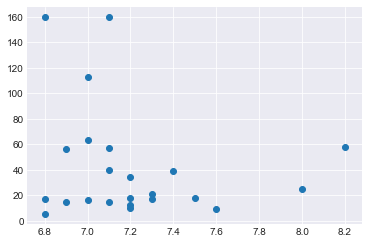

In [45]:
plt.scatter(Magnitud2, Profundidad)

In [46]:
np.corrcoef(Magnitud2,Profundidad)

array([[ 1.        , -0.18779571],
       [-0.18779571,  1.        ]])

Fíjate que se obtiene un valor de correlación $R_{xy} = -0.18779571$, éste nos dice entonces que los datos no están bien relacionadas entre las variables.

#### Ejercicio 3: Terremotos. Inciso 4.)

Primero el arreglo que tiene los radios, llamado `Radios`, luego creo el arreglo de las `Coordenadas` que tiene las tuplas [Latitud, Longitud], luego el arreglo de los colores dados usando la función que nos diste en función de la magnitud. Posteriormente corrí un for que me hiciera todos los marcadores, usando la entra n-ésima de estos arreglos en el for.

In [143]:
Magnitud2**=(3/2)

In [144]:
Radios = Magnitud2

In [145]:
Radios

array([19.31962733, 17.73223054, 19.72351389, 22.627417  , 18.91853588,
       18.91853588, 18.91853588, 18.12481724, 18.52025918, 20.13017635,
       18.52025918, 17.73223054, 20.9517541 , 19.31962733, 20.53959591,
       17.73223054, 19.72351389, 19.31962733, 18.12481724, 18.52025918,
       23.48122654, 18.91853588, 19.31962733])

In [98]:
Coordenadas = []

for n in range(len(SismosInt)):
    
    Coordenadas.append([SismosInt["Latitud"].values[n],SismosInt["Longitud"].values[n]])

In [101]:
Colores = []

for n in range(len(SismosInt)):
    
    Colores.append(intensityColor(SismosInt["Magnitud"].values[n]))

In [147]:
mexmap2 = folium.Map()

import os
import json

#state_geo = os.path.join('helpers/mexican_states.geojson')

mexmap2 = folium.Map([25,-100], zoom_start=4.4)

for n in range(len(SismosInt)):

    folium.CircleMarker(location=Coordenadas[n], radius=Radios[n],color=Colores[n],
                    fill_color=Colores[n],fillOpacity= 0.4,fill = True, colorOpacity = 0.5).add_to(mexmap2)
mexmap2

### Ejercicio 4: Buscando patrones antes de un evento de gran escala (medio difícil)

En la siguiente parte, vamos a ver si, de manera sencilla, podemos encontrar patrones de comportamiento sísmico antes de un evento de gran escala (Terremoto de magnitud >= 7.0). Como primer ejercicio, encuentre cuántos sismos hay con dicha magnitud:

1. Definan un intervalo de tiempo a analizar antes de un sismo de gran magnitud, por ejemplo, 24 horas ó 5 días (justifiquen su escala de tiempo)
2. Para todos los sismos de magnitud igual o mayor a 7.0, grafiquen el comportamiento de la región (en un ángulo sólido prudente) en el periodo de tiempo que escogieron antes del sismo. Busquen si hay algún patrón evidente y concluyan.

Como tip, la diferencia de dos estampas de tiempo genera un pd.Timedelta. La siguiente función puede tomar un arreglo ( o una serie) de `pd.Timedelta` para convertirlo en horas:

In [47]:
toHours = np.vectorize(lambda x : x.total_seconds()/3600)

Les va a ser mucho más fácil si trabajan en horas para este ejercicio.

#### Ejercicio 4.

Primero creo el arreglo que tenga los sismos de magnitud $\leq 7.0$ llamado `Sismos7`.

In [48]:
Sismos7 =  sismos3.loc[(sismos3['Magnitud'] >= 7.0)]

In [49]:
Sismos7

,Magnitud,Latitud,Longitud,Profundidad (km),Fecha y Hora,Estado
524,7.2,16.2500,-98.0300,12,2018-02-16 17:39:38,Oaxaca
16699,7.1,18.4000,-98.7200,57,2017-09-19 13:14:40,Puebla
19741,8.2,14.8500,-94.1100,58,2017-09-07 23:49:18,NaN
23934,7.0,14.7700,-92.0800,113,2017-06-14 02:29:03,NaN
62645,7.2,17.0110,-101.4600,18,2014-04-18 09:27:21,NaN
70545,7.3,14.0272,-92.3155,17,2012-11-07 10:35:50,NaN
73928,7.5,16.2640,-98.4570,18,2012-03-20 12:02:48,NaN
81966,7.2,32.4700,-115.3700,10,2010-04-04 17:40:42,NaN
93522,7.6,18.6000,-104.2200,9,2003-01-21 20:06:34,NaN
97008,7.0,17.9900,-102.6600,16,2000-08-09 06:41:47,NaN


In [50]:
len(Sismos7)

18

Por lo que vemos que hay 18 sismos con magnitud mayor o igual que 7.0.

##### Y al final lo dejé este al último porque sabía cómo hacerlo pero ya no alcancé a terminarlo. Igual estuvo padre la tarea jaja. Gracias!

# Ejercicio 5: Qué más nos hace falta decir? (extra)

En esta última parte, pueden hacer **lo que quieran** con los datos. Agruparlos, clasificarlos, tienen libertad de sacar conclusiones de los datos que les he dado, pueden hacer algo con los mapas o hacer histogramas, queda en ustedes :)

In [51]:
#Código aquí (si así lo quieren)